<a href="https://colab.research.google.com/github/LeoLin72/IULM_DDM2324_Notebooks/blob/main/23_RegressioneLogisticaTKL_Acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##REGRESSIONE LINEARE

Importiamo il data set

In [12]:
import pandas as pd
import statsmodels.api as sm

# Supponiamo che queste siano le colonne del dataset
independent_vars = ['Intercept', 'Price', 'Warranty', 'Delivery_Time', 'Sales_Support',
           'Industry_Group_Ele', 'Industry_Group_Cons', 'Firm_Size',
           'Buying_Center']
!wget "https://github.com/LeoLin72/IULM_DDM2324_Notebooks/raw/main/data/TKL.xlsx"
# Caricare il dataset (da sostituire con il percorso corretto del file)
data = pd.read_excel("TKL.xlsx")

data.head()


--2024-04-10 08:26:02--  https://github.com/LeoLin72/IULM_DDM2324_Notebooks/raw/main/data/TKL.xlsx
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LeoLin72/IULM_DDM2324_Notebooks/main/data/TKL.xlsx [following]
--2024-04-10 08:26:02--  https://raw.githubusercontent.com/LeoLin72/IULM_DDM2324_Notebooks/main/data/TKL.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104327 (102K) [application/octet-stream]
Saving to: ‘TKL.xlsx’

TKL.xlsx            100%[===================>] 101.88K  --.-KB/s    in 0.004s  

2024-04-10 08:26:02 (27.0 MB/s) - ‘TKL.xlsx’ saved [104327/104327]



,Observations / Segmentation Variables,Acquired,Price,Warranty,Delivery_Time,Sales_Support,Industry_Group_Ele,Industry_Group_Cons,Firm_Size,Buying_Center
0,Respondent 1,0,101,14,14,5,0,1,53,0
1,Respondent 2,0,98,60,7,3,0,0,65,1
2,Respondent 3,1,98,30,7,8,1,0,65,1
3,Respondent 4,1,94,30,3,8,1,0,50,1
4,Respondent 5,1,92,60,3,5,0,0,38,1


 Nella libreria statsmodels di Python, a differenza di alcuni software statistici come R, l'intercetta non è inclusa automaticamente nei modelli. Pertanto, è necessario aggiungerla manualmente al set di dati prima di eseguire la regressione.

In [13]:
data['Intercept'] = 1

# Eseguire la regressione logistica
logit_model = sm.Logit(data['Acquired'], data[independent_vars])
fit = logit_model.fit()

# Visualizzare i risultati
print(fit.summary())



Optimization terminated successfully.
         Current function value: 0.569486
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Acquired   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1991
Method:                           MLE   Df Model:                            8
Date:                Wed, 10 Apr 2024   Pseudo R-squ.:                  0.1784
Time:                        08:26:05   Log-Likelihood:                -1139.0
converged:                       True   LL-Null:                       -1386.3
Covariance Type:            nonrobust   LLR p-value:                9.905e-102
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4872      0.562      2.645      0.008       0.385       2.589
Pr

# Esempio di Grafico 1

Optimization terminated successfully.
         Current function value: 0.569486
         Iterations 6


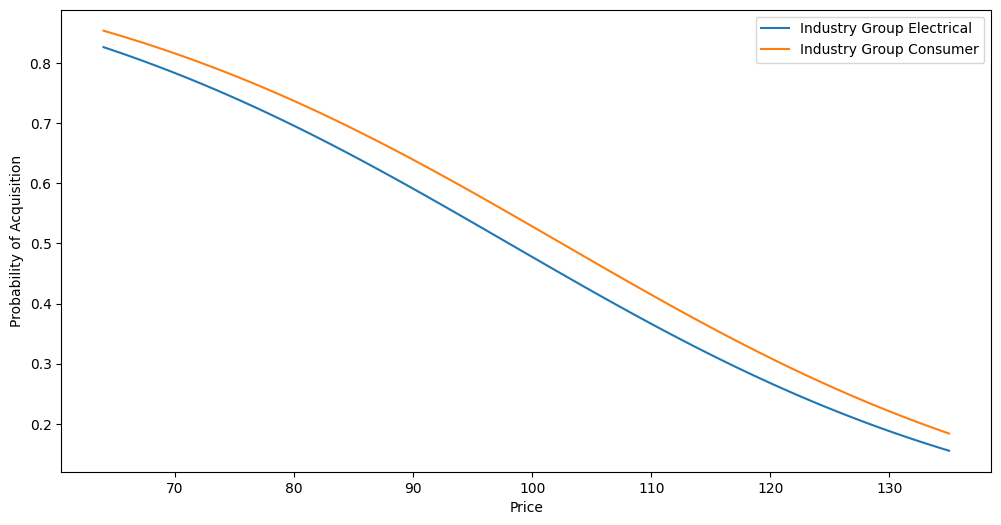

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Computing mean or mode for independent variables
mean_or_mode_values = {
    'Warranty': data['Warranty'].mean(),
    'Delivery_Time': data['Delivery_Time'].mean(),
    'Sales_Support': data['Sales_Support'].mean(),
    'Firm_Size': data['Firm_Size'].mean(),
    'Buying_Center': data['Buying_Center'].mode()[0],  # Mode for categorical variable
    'Intercept': 1  # Intercept is always 1
}

# Range of 'Price' values from minimum to maximum
price_range = np.linspace(data['Price'].min(), data['Price'].max(), 100)

# Prepare data for prediction
def prepare_data_for_prediction(price, industry_ele, industry_cons):
    prediction_data = mean_or_mode_values.copy()
    prediction_data['Price'] = price
    prediction_data['Industry_Group_Ele'] = industry_ele
    prediction_data['Industry_Group_Cons'] = industry_cons
    return prediction_data

# Perform logistic regression
independent_vars = ['Intercept', 'Price', 'Warranty', 'Delivery_Time', 'Sales_Support',
                    'Industry_Group_Ele', 'Industry_Group_Cons', 'Firm_Size', 'Buying_Center']
logit_model = sm.Logit(data['Acquired'], data[independent_vars])
fit = logit_model.fit()

# Compute probabilities for each price for both industry groups
probabilities_ele = []
probabilities_cons = []
for price in price_range:
    # For Industry Group Electrical
    data_ele = prepare_data_for_prediction(price, 1, 0)
    prob_ele = fit.predict(pd.DataFrame([data_ele], columns=independent_vars))[0]
    probabilities_ele.append(prob_ele)

    # For Industry Group Consumer
    data_cons = prepare_data_for_prediction(price, 0, 1)
    prob_cons = fit.predict(pd.DataFrame([data_cons], columns=independent_vars))[0]
    probabilities_cons.append(prob_cons)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(price_range, probabilities_ele, label='Industry Group Electrical')
plt.plot(price_range, probabilities_cons, label='Industry Group Consumer')
plt.xlabel('Price')
plt.ylabel('Probability of Acquisition')
plt.legend()
plt.grid(False)
plt.show()


In [15]:
mean_or_mode_values

{'Warranty': 35.434,
 'Delivery_Time': 6.8245,
 'Sales_Support': 6.1475,
 'Firm_Size': 50.858,
 'Buying_Center': 1,
 'Intercept': 1}

Optimization terminated successfully.
         Current function value: 0.569486
         Iterations 6


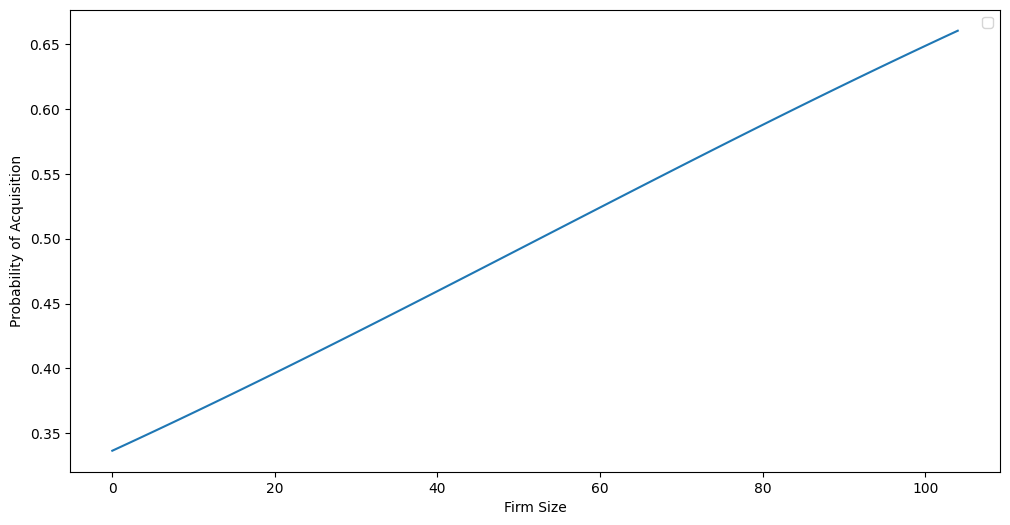

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Computing mean or mode for independent variables
mean_or_mode_values = {
    'Warranty': data['Warranty'].mean(),
    'Delivery_Time': data['Delivery_Time'].mean(),
    'Sales_Support': data['Sales_Support'].mean(),
    'Price': data['Price'].mean(),
    'Industry_Group_Ele': 1,
    'Industry_Group_Cons': 0,
    'Buying_Center': data['Buying_Center'].mode()[0],  # Mode for categorical variable
    'Intercept': 1  # Intercept is always 1
}

# Range of 'Price' values from minimum to maximum
firm_range = np.linspace(0, data['Firm_Size'].max(), 100)

# Prepare data for prediction
def prepare_data_for_prediction(firm_range):
    prediction_data = mean_or_mode_values.copy()
    prediction_data['Firm_Size'] = firm_range
    return prediction_data

# Perform logistic regression
independent_vars = ['Intercept', 'Price', 'Warranty', 'Delivery_Time', 'Sales_Support',
                    'Industry_Group_Ele', 'Industry_Group_Cons', 'Firm_Size', 'Buying_Center']
logit_model = sm.Logit(data['Acquired'], data[independent_vars])
fit = logit_model.fit()

# Compute probabilities for each price for both industry groups
probabilities = []
for firm_size in firm_range:
    data = prepare_data_for_prediction(firm_size)
    probs = fit.predict(pd.DataFrame([data], columns=independent_vars))[0]
    probabilities.append(probs)


# Plotting
plt.figure(figsize=(12, 6))
plt.plot(firm_range, probabilities)
plt.xlabel('Firm Size')
plt.ylabel('Probability of Acquisition')
plt.legend()
plt.grid(False)
plt.show()


In [6]:
probabilities

[0.33660193231475843,
 0.33963731430558286,
 0.3426859290826467,
 0.34574758113232007,
 0.3488220708567819,
 0.35190919460951964,
 0.3550087447333701,
 0.3581205096011011,
 0.36124427365853384,
 0.36437981747020093,
 0.3675269177675335,
 0.3706853474995696,
 0.3738548758861693,
 0.37703526847372454,
 0.3802262871933446,
 0.3834276904214972,
 0.38663923304308356,
 0.3898606665169207,
 0.39309173894360305,
 0.3963321951357128,
 0.399581776690344,
 0.4028402220639058,
 0.4061072666491637,
 0.40938264285447895,
 0.41266608018519957,
 0.4159573053271582,
 0.4192560422322253,
 0.4225620122058666,
 0.4258749339966501,
 0.42919452388764456,
 0.43252049578965307,
 0.4358525613362148,
 0.43919042998031727,
 0.4425338090927481,
 0.4458824040620199,
 0.44923591839579874,
 0.4525940538237631,
 0.4559565104018193,
 0.4593229866175975,
 0.462693179497153,
 0.4660667847127891,
 0.4694434966919272,
 0.4728230087269358,
 0.47620501308584134,
 0.4795892011238314,
 0.4829752633954688,
 0.4863628897675277,